# Question 6 Integrate and Fire

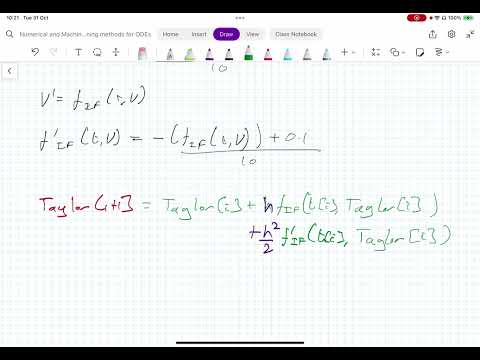

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('KDQpwb8MSOc', width=800, height=300)

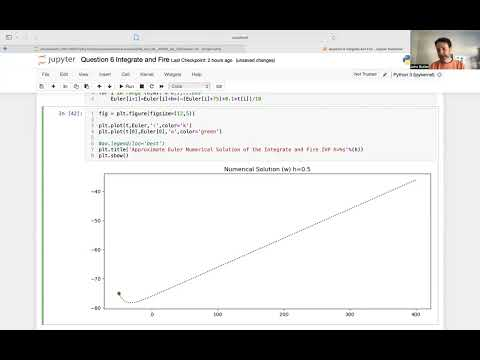

In [2]:
YouTubeVideo('VSJvHiw6oo8', width=800, height=300)

Approximate the solution of the integrate and fire differential equation:
\begin{equation} \tau_m\frac{dV}{dt} = -(V-E_L) + R_mI(t),  \ \ -50\leq t \leq 400, \end{equation}
where $E_L = -75$, $\tau_m = 10$,
$R_m = 10$ and $I(t)=0.01t$
and the initial condition
$V(-50) = -75$ using a stepsize of $h=0.5$.
Using the:

1. Euler Method;

2. 2nd Order Taylor Method;

3. Heun's Method (2nd Order Runge Kutta);

4. 2-step Adams Bashforth Method.
 

In [3]:
## Library
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


## Discrete Interval
The continuous time $a\leq t \leq b $ is discretised with stepsize $h=0.5$ gives
\begin{equation} 
N=\frac{b-a}{h}.
\end{equation}
Here the N is $-50\leq t \leq 400$ 
\begin{equation}
 N=\frac{400--50}{0.5}=900,
\end{equation}
this gives the 901 discrete points:
\begin{equation}
 t_0=-400, \ t_1=-399.5, \ ... t_{900}=400. 
\end{equation}
This is generalised to 
\begin{equation}
t_i=-50+i0.1, \ \ \ i=0,1,...,900.
\end{equation}
The plot below shows the discrete time steps.

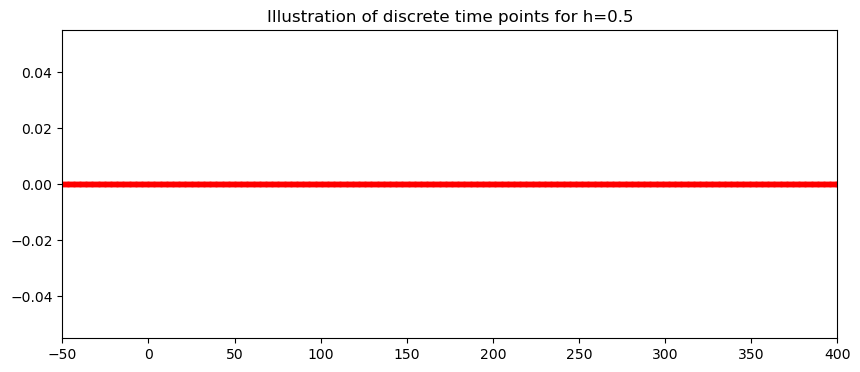

In [4]:
### Setting up time
a=-50 # Start time point
b=400 # end time point
h=0.5 # step size

N=int((b-a)/(h)) # Number of gaps 

t=np.arange(a,b+h/2,h) # -50, 400

fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'.',color='red')
plt.xlim((a,b))
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.plot();

## Euler Method
The general form of the Euler method is
\begin{equation}
w_{i+1}=w_{i}+hf(t_i,w_i).
\end{equation}

The Integrate and fire differential equation is transformed using the Euler method into a difference equation of the form
\begin{equation} w_{i+1}=w_{i}+h\big[\frac{-(w_i-E_L) + R_mI(t_i)}{\tau_m}\big] \end{equation} 
for $i=0,1,...,899$ and
where $E_L = -75$, $\tau_m = 10$,
$R_m = 10$ and $I(t_i)=0.01t_i$
and the initial condition
$V(t_0=-50) = -75$ using a stepsize of $h=0.5$.
Putting in the values the difference equation is 
\begin{equation} w[i+1]=w[i]+0.5\big[-(w[i]--75) + 10*0.01*t[i]\big]/10 \end{equation} 
\begin{equation} \color{red}{w[i+1]}=\color{green}{w[i]}+0.5\big(-(\color{red}{w[i]}+75) + 0.1*t[i]\big)/10 .\end{equation} 
In the solution, I will use Euler for Euler approximation, which gives:
\begin{equation} \color{red}{Euler[i+1]}=\color{green}{Euler[i]}+0.5\big(-(\color{red}{Euler[i]}+75) + 0.1*t[i]\big)/10. \end{equation} 

In [5]:
Euler=np.zeros(N+1) # list of 901 0s
Euler[0]=-75 ## INITIAL CONDITION
for i in range (0,N): # 0,1,...899
    Euler[i+1]=Euler[i]+h*(-(Euler[i]+75)+0.1*t[i])/10

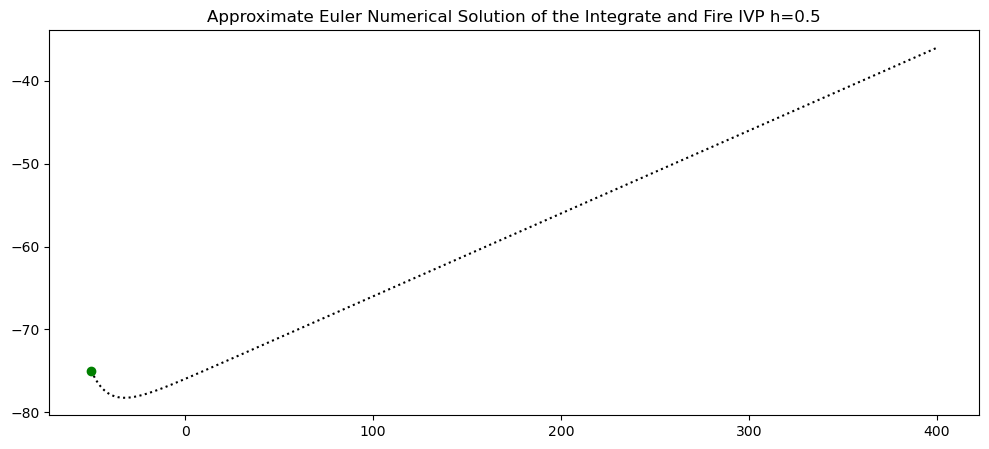

In [6]:
fig = plt.figure(figsize=(12,5))
plt.plot(t,Euler,':',color='k')
plt.plot(t[0],Euler[0],'o',color='green')
plt.title('Approximate Euler Numerical Solution of the Integrate and Fire IVP h=%s'%(h))
plt.show()

For simpilicty of numerical implimentation of the integrate and fire differential equation:
\begin{equation} \tau_m\frac{dV}{dt} = -(V-E_L) + R_mI(t), \end{equation}
we re-arranged as:
\begin{equation} \frac{dV}{dt} =f_{IF}(t,V), \end{equation}
where
\begin{equation} f_{IF}(t,V) = \frac{-(V-E_L) + R_mI(t)}{\tau_m}.\end{equation}



In [7]:
# definint a function for f_IF that takes in t and V
def f_IF(t,V):
    R_m=10
    tau_m=10
    E_L=-75
    I=0.01*t
    f=(-(V-E_L)+R_m*I)/tau_m
    return f

### 2nd Order Taylor
The general 2nd Order Taylor method for to the first order differential equation
\begin{equation} y^{'} = f(t,y), \end{equation}
numerical approximates $y$ the at time point $t_i$ as $w_i$
with the  formula:
\begin{equation}
 w_{i+1}=w_i+h\big[f(t_i,w_i)+\frac{h}{2}f'(t_i,w_i)\big],\end{equation}
where $h$ is the stepsize.
for $i=0,...,N-1$.


For the Integrate and fire:
\begin{equation} f_{IF}(t,V) = \frac{-(V-E_L) + R_mI(t)}{\tau_m}.\end{equation}
The 2nd Order Taylor will be of the form:
\begin{equation}
w_{i+1}=w_i+h\big[f_{IF}(t_i,w_i)+\frac{h}{2}f'_{IF}(t_i,w_i)\big].
\end{equation}
We need to get $f_{IF}'$:
\begin{equation} f_{IF}'(t,V) = \frac{-(V'-0) + R_mI'(t)}{\tau_m}.\end{equation}
by definition of the IVP we have:
\begin{equation} V'(t)=f_{IF}(t,V) = \frac{-(V-E_L) + R_mI(t)}{\tau_m}\end{equation}
and $I(t)=0.01t$
\begin{equation} I'(t)=0.01.\end{equation}

In the solution, I will use Taylor for Taylor approximation, which gives:
\begin{equation} \color{red}{Taylor[i+1]}=\color{green}{Taylor[i]}+0.5f_{IF}(t[i],\color{green}{Taylor[i]})+\frac{0.5^2}{2}f'_{IF}(t[i],\color{green}{Taylor[i]}) \end{equation} 
which gives:
\begin{equation} \color{red}{Taylor[i+1]}=\color{green}{Taylor[i]}+0.5f_{IF}(t[i],\color{green}{Taylor[i]})+\frac{0.5^2}{2}(-f_{IF}(t[i],\color{green}{Taylor[i]})/\tau_m+0.1/\tau_m) \end{equation} 

In [8]:
Taylor=np.zeros(N+1)
Taylor[0]=-75 ## INITIAL CONDITION
for i in range (0,N):
## ADD EQUATION DYNAMICS TO EQUATION
    Taylor[i+1]=Taylor[i]+h*f_IF(t[i],Taylor[i])+h*h/2*(-f_IF(t[i],Taylor[i])/10+0.1/10)


### Heun's Method (2nd Order Runge Kutta)
The general Heun's method for to the first order differential equation
\begin{equation} y^{'} = f(t,y) \end{equation}
numerical approximates $y$ the at time point $t_i$ as $w_i$
with the  formula:
\begin{equation} w_{i+1}=w_i+\frac{h}{2}\big[k_1+k_2],\end{equation}
for $i=0,...,N-1$, where 
\begin{equation}k_1=f(t_i,w_i),\end{equation}
and
\begin{equation}k_2=f(t_i+h,w_i+hk_1),\end{equation}
and $h$ is the stepsize.

In the solution, I will use Huen for Heun approximation, which gives:
\begin{equation} Heun[i+1]=Huen[i]+\frac{h}{2}\big[k_1+k_2],\end{equation}
for $i=0,...,N-1$, where 
\begin{equation}k_1=f_{IK}(t[i],Huen[i]),\end{equation}
and
\begin{equation}k_2=f_{IK}(t[i]+h,Heun[i]+hk_1),\end{equation}
and $h$ is the stepsize.

In [9]:
Heun=np.zeros(N+1)
Heun[0]=-75 ## INITIAL CONDITION
for i in range (0,N):
## ADD EQUATION DYNAMICS TO EQUATION
    k1=f_IF(t[i],Heun[i])
    k2=f_IF(t[i]+h,Heun[i]+h*k1)
    Heun[i+1]=Heun[i]+h/2*(k1+k2)

### 2-step Adams-Bashforth
The general 2-step Adams-Bashforth method for the first order differential equation
\begin{equation} y^{'} = f(t,y), \end{equation}
numerical approximates $y$ the at time point $t_i$ as $w_i$
with the  formula:
\begin{equation} w_{i+1}=w_i+\frac{h}{2}\big[3f(t_i,w_i)-f(t_{i-1},w_{i-1})\big],\end{equation}
for $i=1,...,N-1$, where 

and $h$ is the stepsize.


For the Integrate and Fire Equation we have
\begin{equation} w_{i+1}=w_i+\frac{h}{2}\big[3f_{IF}(t_i,w_i)-f_{IF}(t_{i-1},w_{i-1})\big],\end{equation}
I will use AB to denote the approximate from the 2-step Adams-Bashforth:
\begin{equation} AB[i+1]=AB[i]+\frac{h}{2}\big[3f_{IF}(t[i],AB[i])-f_{IF}(t[i-1],AB[i-1])\big],\end{equation}
for $i=1,...,899$.
We need to approximate $AB[1]$ for the 2-step method. Here I will use the Heun solution at the second step i=1.

In [10]:
AB=np.zeros(N+1)
AB[0]=-75 ## INITIAL CONDITION
AB[1]=Heun[1] ## INITIAL HUEN CONDITION
for i in range (1,N):
    AB[i+1]=AB[i]+h/2*(3*f_IF(t[i],AB[i])-f_IF(t[i-1],AB[i-1]))

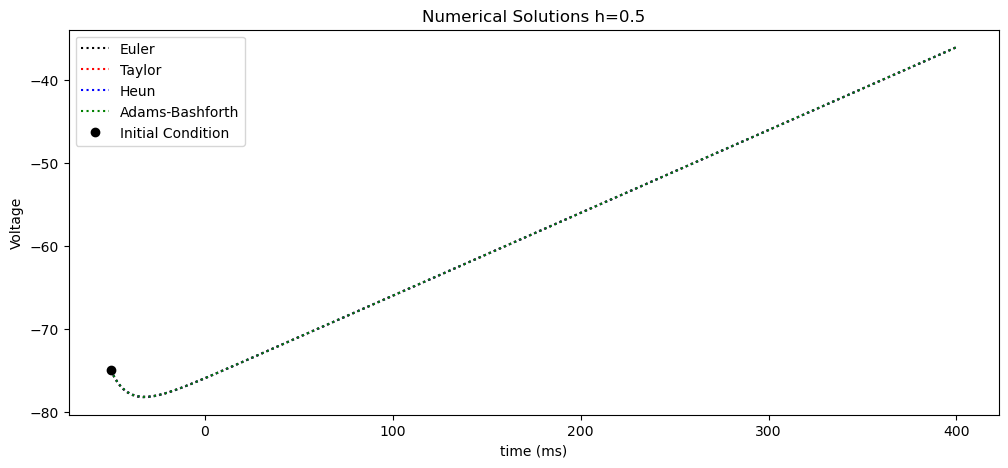

In [11]:
fig = plt.figure(figsize=(12,5))

plt.plot(t,Euler,':',color='k',label='Euler')
plt.plot(t,Taylor,':',color='r',label='Taylor')
plt.plot(t,Heun,':',color='b',label='Heun')
plt.plot(t,AB,':',color='g',label='Adams-Bashforth')

plt.plot(t[0],Euler[0],'o',color='black',label='Initial Condition')

plt.legend(loc='best')
plt.xlabel('time (ms)')
plt.ylabel('Voltage')
plt.title('Numerical Solutions h=%s'%(h))
plt.show()

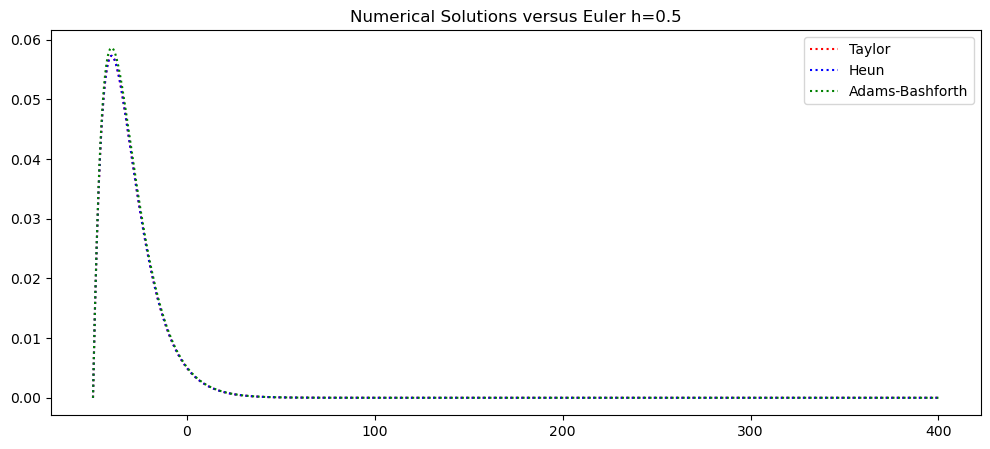

In [12]:
fig = plt.figure(figsize=(12,5))

plt.plot(t,Taylor-Euler,':',color='r',label='Taylor')
plt.plot(t,Heun-Euler,':',color='b',label='Heun')
plt.plot(t,AB-Euler,':',color='g',label='Adams-Bashforth')


plt.legend(loc='best')
plt.title('Numerical Solutions versus Euler h=%s'%(h))
plt.show()